# Prediction of HF within 10 years using Artificial Intelligence (End-to-End Implementation)
## Agenda 
1. Introduction
2. AI, more specfically Deep Learning
3. Pre-requisities and Technology
4. Prediction of HF within 10 years using Artificial Intelligence
5. Data Overview, Exploratory Data Analysis with Pandas and NumPy
6. Data split (Cross Validation) to have robust and generalizable AI model (Hyperparameter Tuning)
7. Data Manipulation (Imputation if needed)
8. Building and deploying DL model
9. Feature extraction from DL model

## Introduction

Ibrahim Karabayir, PhD, is working on Dr.Akbilgic's lab as a research fellow, focused on to create solution CVD based problems and other clinical problems using AI, such as HF prediction, predction late onset Cardiomyopathy among Childhood Cancer, deep phenotyping HFpEF, predicting Parkinson's Disease risk using ECG and other clinical data, predicting rapid decline in kidney function, and much more. Dr. Karabayir is graduated from IStanbul University in 2018, which his PhD thesis focused on proposing swarm intelligence based optimization algorithm to optimize DL models, his study published in IEEE TNNLS (impact factor of 10.451).

## Artificial Intelligence in General and Deep Learning



<table><tr>
<td> <img src="800px-AI-ML-DL.svg.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="deep-learning-2.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

<table><tr>
<td> <img src="visualization-of-the-neural-network.gif" alt="Drawing" style="width: 450px; height: 4000x"/> </td>
<td> <img src="KindAmpleImperialeagle-size_restricted.gif" alt="Drawing" style="width: 150px;  height: 10x"/> </td>
</tr></table>

## Pre-requisities and Technology

There may be some technological barriers to build huge DL, like having GPU. DL libraries are making calculations using symbolic Tensors. These symbolic (declarative) API is written on GPU. With Symbolic APIs your model is a graph-like data structure
Symbolic tensor differs from other tensors in that they do not specifically hold values.


### Examples

No values are explicitly being defined in the network. Rather, a framework is created for the input variables to be read by the network, and then generate predictions.

```python
import theano as th 
a = th.iscalar()
b = th.iscalar()
f = theano.function([a, b], a + b)
f(10,32)


from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4,)))
model.add(layers.Dense(1, activation='sigmoid'))


```

### Benefits of Symbolic APIs
- Having huge capacity to run DL models efficently ans fast thanks to GPU
- Able to display the model
- Debugging happens in model building not during executions, it will provide that once the model compiled, it will run. (exception data)
- Consistent API, it means model can be reusable and sharable. It is so important for transfer learning, and feature extraction from intermediate layers.
- Easy tha clone and copy. You dont have to create the model from scratch, you can get same model, or same structure from another model.




## Prediction of HF within 10 years using Artificial Intelligence

![graphical_abstract.jpg](attachment:graphical_abstract.jpg)

- Data from the baseline visits (1987-89) of the Atherosclerosis Risk in Communities (ARIC) Study
- The ARIC is an ongoing prospective epidemiologic study, designed to investigate the etiology of atherosclerosis and its clinical outcomes, and cardiovascular risk factors associated with demographics, race, gender and time
- From 1987 to 1989 (visit 1, and considered as the baseline for our study), a total of 15,792 participants (8,710 women and 4,266 of black race) were enrolled and completed a home interview and clinic visit
- An additional six follow-up clinic visits occurred, with visit 2 occurring between 1990-1992, visit 3 being held between 1993-1996 and visit 4 held between 1996 and 1998 reducing to 11,656 participants. Visit 5 was held in 2011-2013 and visits 6 and 7 occurring between 2017 and 2019.
- In this study we utilize data from visit 1 to visit 4 in AI based models
- Participants with good quality baseline ECG were included.
- Participants with prevalent HF were excluded
- Outcomes: Our main outcome was the prediction of new onset heart failure events within 10 years from visit 1 baseline examination.
- ECG data: Raw digital ECG data (time-voltage) for 12 leads from the baseline (visit 1) were used. A supine 12-lead ECG at 250 Hz frequency of 10 seconds at rest was used


## Data Overview, Exploratory Data Analysis with Pandas and NumPy

In [ ]:
## Import necessary packages

from __future__ import division



import numpy as np
import pandas as pd
import glob
import os
import csv
import joblib
import pickle
import sklearn as sk
import joblib
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from keras import models 
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import keras
from keras.layers import Dense, Conv2D, Conv1D, BatchNormalization, Activation
from keras.layers import MaxPooling1D, Input, Flatten
from sklearn.utils import class_weight, compute_class_weight
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn import preprocessing
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import KFold,StratifiedKFold
#from xgboost import XGBClassifier
from scipy import signal
from keras.utils import np_utils
import keras.backend as K

print(os.getcwd())


/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls /content/gdrive/My\ Drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'2016 kasım öncesi'
'Chicago Zoological Society - membership_print.pdf'
 cifar100_resnet56_evgo3_deneme.ipynb
 Classroom
'Colab Notebooks'
'Copy of National Leaders Idioms_IK.gdoc'
 day1-3-17-2020.7z
 DEMO_WakeForest
 ecg_stjude
 IbrahimDataNew.xlsx
 IK0_10_5_25.h5
 IK1_10_5_28.h5
 IK2_10_5_17.h5
 IK3_10_5_21.h5
 IK4_10_5_37.h5
 lastdata.xlsx
 masaustu_drive
 MESAtest_1_500_12.npy
 MESAtest_GPUTF.ipynb
 MESAtest_GPUTF_lite.ipynb
 Models_CNN
 model.tflite
 my_excel_file_stand_coef.xlsx
 my_excel_file.xlsx
 optimizasyon_calismalar_11_mayis
 OzappleECG_MAIN_DATA.npy
 OzappleECG.npy
'Revision_A Novel Learning Algorithm to Optimize Deep Neural Networks Evolved Gradient Direction Optimizer (EVGO)_v1.docx'
'Revision_A Novel Learning Algorithm to Optimize Deep Neural Networks Evolved Gradient Direction Optimizer (EVGO)_v6.docx'
 tenant_ledger-ibrahim_karabayir_hav

In [ ]:
%cd /content/gdrive/My\ Drive/DEMO_WakeForest

/content/gdrive/My Drive/DEMO_WakeForest


In [ ]:
# Check out versions of libraries we have
print ("Numpy version is ", np.__version__)
print ("TF version is ", tf.__version__)
print ("Keras version is ", keras.__version__)


Numpy version is  1.21.6
TF version is  2.8.0
Keras version is  2.8.0


### Data import

In [ ]:
# ECGs_raw = np.load("data/visit1_leads_sortedbyPID_14613.npy", allow_pickle = True)[:1000]
clinical_variables = pd.read_csv("clinicaldata_10yrs_final_dummy.csv")[:1000]


In [ ]:
# ECGs=ECGs_raw[::,250:,]
clinical_variables = clinical_variables.replace(to_replace=' ', value=np.nan, regex=True)

### Explore the data

In [ ]:
#ECGs_raw.shape, ECGs.shape, 
clinical_variables.shape

(1000, 18)

In [ ]:
clinical_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1000 non-null   int64  
 1   male          1000 non-null   int64  
 2   black         1000 non-null   int64  
 3   V1AGE01       1000 non-null   int64  
 4   DIABTS03      1000 non-null   int64  
 5   HYPTMDCODE01  1000 non-null   int64  
 6   BMI01         999 non-null    float64
 7   sbp1          1000 non-null   float64
 8   GLUSIU01      986 non-null    float64
 9   CIGTYR01      972 non-null    object 
 10  PRVCHD05      1000 non-null   int64  
 11  HDLSIU02      973 non-null    float64
 12  CIGT01        997 non-null    float64
 13  CLVH01        932 non-null    float64
 14  LDLSIU02      957 non-null    float64
 15  dbp1          1000 non-null   float64
 16  afecgv1       1000 non-null   int64  
 17  HF_10years    1000 non-null   int64  
dtypes: float64(8), int64(9), obje

In [ ]:
clinical_variables['CIGTYR01'] = clinical_variables['CIGTYR01'].astype(float)

In [ ]:
clinical_variables['CIGTYR01'].dtype

dtype('float64')

In [ ]:
clinical_variables.male.value_counts() *100 / clinical_variables.shape[0] 

0    54.6
1    45.4
Name: male, dtype: float64

In [ ]:
clinical_variables.head()

,ID,male,black,V1AGE01,DIABTS03,HYPTMDCODE01,BMI01,sbp1,GLUSIU01,CIGTYR01,PRVCHD05,HDLSIU02,CIGT01,CLVH01,LDLSIU02,dbp1,afecgv1,HF_10years
0,100010,0,1,51,1,1,30.31,180.0,15.50,680.0,0,1.05,1.0,0.0,4.00,102.0,0,0
1,100047,0,0,60,0,0,25.75,149.0,5.51,0.0,0,2.02,3.0,NaN,1.61,76.0,0,0
2,100068,0,0,53,0,0,30.73,114.0,5.67,170.0,0,1.20,2.0,0.0,3.36,77.0,0,0
3,100079,0,1,47,1,1,34.81,124.0,12.94,0.0,0,1.44,3.0,1.0,4.54,75.0,0,0
4,100084,0,1,47,0,0,28.81,156.0,4.76,0.0,0,1.02,3.0,0.0,3.78,86.0,0,0


In [ ]:
clinical_variables.isna().sum()

ID               0
male             0
black            0
V1AGE01          0
DIABTS03         0
HYPTMDCODE01     0
BMI01            1
sbp1             0
GLUSIU01        14
CIGTYR01        28
PRVCHD05         0
HDLSIU02        27
CIGT01           3
CLVH01          68
LDLSIU02        43
dbp1             0
afecgv1          0
HF_10years       0
dtype: int64

It shows that We will need to impute the data

In [ ]:
labels= clinical_variables['HF_10years']
np.sum(labels), np.sum(labels)/len(labels)

(55, 0.055)

In [ ]:
features = clinical_variables.iloc[ :  ,  1 : -1]
features.describe()

,male,black,V1AGE01,DIABTS03,HYPTMDCODE01,BMI01,sbp1,GLUSIU01,CIGTYR01,PRVCHD05,HDLSIU02,CIGT01,CLVH01,LDLSIU02,dbp1,afecgv1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,999.000000,1000.000000,986.000000,972.000000,1000.00000,973.000000,997.000000,932.000000,957.000000,1000.000000,1000.000000
mean,0.454000,0.235000,54.351000,0.103000,0.289000,27.775095,121.847000,5.925406,292.945473,0.04200,1.333104,2.186560,0.021459,3.763406,75.680000,0.001000
std,0.498129,0.424211,5.694403,0.304111,0.453525,5.127203,18.003381,2.244252,400.765773,0.20069,0.410936,0.797398,0.144987,1.021981,11.633182,0.031623
min,0.000000,0.000000,44.000000,0.000000,0.000000,16.750000,81.000000,2.990000,0.000000,0.00000,0.300000,1.000000,0.000000,0.000000,41.000000,0.000000
25%,0.000000,0.000000,49.750000,0.000000,0.000000,24.305000,110.000000,5.080000,0.000000,0.00000,1.050000,2.000000,0.000000,3.120000,68.000000,0.000000
50%,0.000000,0.000000,54.000000,0.000000,0.000000,27.050000,120.000000,5.400000,80.000000,0.00000,1.270000,2.000000,0.000000,3.720000,75.000000,0.000000
75%,1.000000,0.000000,59.000000,0.000000,1.000000,30.425000,132.000000,5.880000,512.500000,0.00000,1.540000,3.000000,0.000000,4.380000,82.000000,0.000000
max,1.000000,1.000000,66.000000,1.000000,1.000000,54.410000,208.000000,28.760000,2460.000000,1.00000,3.660000,3.000000,1.000000,8.550000,130.000000,1.000000


### Visualize an example ECG

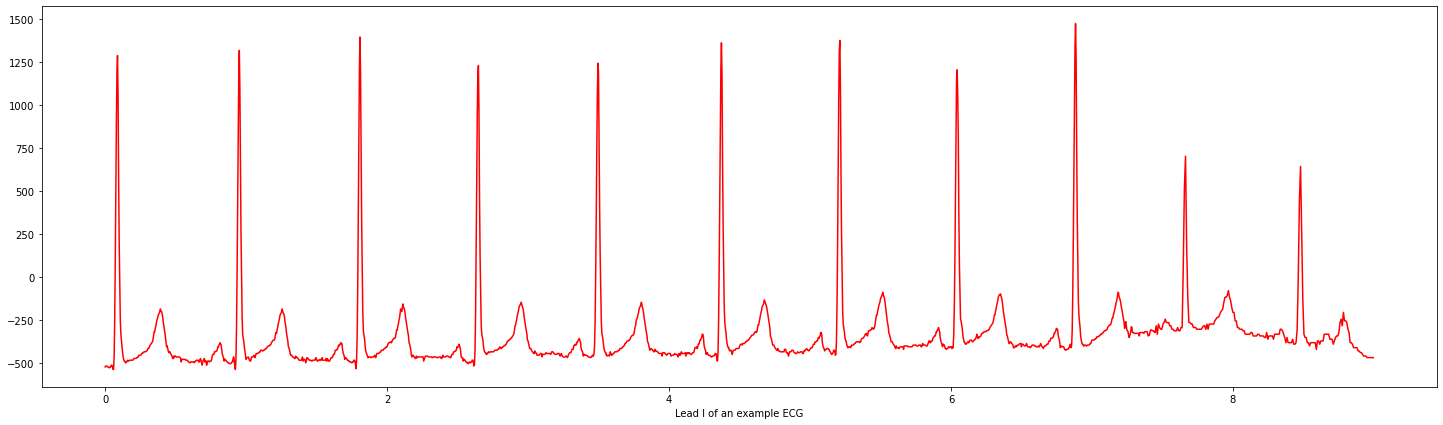

### Resampling 
Make data upsampling for ECGs. Here we're artificially creating data to increase sampling frequency from 250Hz to 500Hz. You may need it to balance dataset from different sites or just by simply having more detailed input. We'll use scipy's signal function. For reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html


In [ ]:
ECGs_resampled = np.random.rand(1000,4500,12)
ECGs_resampled

array([[[-522.        , -527.07878833, -517.        , ...,
         -525.11655363, -522.        , -519.30940411],
        [-522.        , -525.9702311 , -527.        , ...,
         -518.74799954, -512.        , -509.06470799],
        [-512.        , -515.08330283, -517.        , ...,
         -380.29993139, -254.        ,  -95.23241423],
        ...,
        [-390.        , -392.13981492, -390.        , ...,
         -394.6264488 , -395.        , -395.10166897],
        [-400.        , -403.73766825, -400.        , ...,
         -415.68612985, -410.        , -403.56742017],
        [-410.        , -417.68439488, -410.        , ...,
         -444.66068023, -410.        , -281.31966992]],

       [[-420.        , -389.66548231, -420.        , ...,
         -412.90311989, -425.        , -432.70680538],
        [-425.        , -417.92612142, -425.        , ...,
         -387.29694362, -400.        , -411.4675621 ],
        [-415.        , -417.73047756, -425.        , ...,
         -391.

In [ ]:
ECGs_resampled.shape

(1000, 4500, 12)

## Data split (Cross Validation) to have robust and generalizable AI model (Hyperparameter Tuning)

In [ ]:
X_CV, X_holdout, Feat_CV, Feat_holdout, y_CV, y_holdout = train_test_split(ECGs_resampled, features, labels,
                                                                           test_size=0.20, random_state=0, stratify = labels)


In [ ]:
print ("(CV set) Number of samples: " + str(len(X_CV)) + " and (CV set) Number of cases: "+  str(np.sum(y_CV)))
print ("(Holdout set) Number of samples: " + str(len(X_holdout)) + " and (Holdout set) Number of cases: "+  str(np.sum(y_holdout)))

(CV set) Number of samples: 800 and (CV set) Number of cases: 44
(Holdout set) Number of samples: 200 and (Holdout set) Number of cases: 11


In [ ]:
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)


TRA_X = []
feat_TRA_X = []
TRA_Y = []

VAL_X = []
feat_VAL_X = []
VAL_Y = []





print ('starting to split')

for fold_cv_, (tr_idx, val_idx) in enumerate(skf.split(X_CV, y_CV)):
    strLog = "fold_cv_ {}".format(fold_cv_)
    print(strLog)

    trax = X_CV[tr_idx]
    tray= y_CV.iloc[tr_idx]
    feat_tra_x=Feat_CV.iloc[tr_idx]

    valx = X_CV[val_idx]
    valy= y_CV.iloc[val_idx]
    feat_val_x=Feat_CV.iloc[val_idx]

    print ("(Train set) Number of samples: " + str(len(trax)) + "(Train set) Number of cases: "+  str(np.sum(tray)))
    TRA_X.append(trax)
    TRA_Y.append(tray)
    print ("(Validation set) Number of samples: " + str(len(valx)) + "(Validation set) Number of cases: " + str(np.sum(valy)))

    VAL_X.append(valx)
    VAL_Y.append(valy)

    feat_TRA_X.append(feat_tra_x)
    feat_VAL_X.append(feat_val_x)



starting to split
fold_cv_ 0
(Train set) Number of samples: 640(Train set) Number of cases: 36
(Validation set) Number of samples: 160(Validation set) Number of cases: 8
fold_cv_ 1
(Train set) Number of samples: 640(Train set) Number of cases: 35
(Validation set) Number of samples: 160(Validation set) Number of cases: 9
fold_cv_ 2
(Train set) Number of samples: 640(Train set) Number of cases: 35
(Validation set) Number of samples: 160(Validation set) Number of cases: 9
fold_cv_ 3
(Train set) Number of samples: 640(Train set) Number of cases: 35
(Validation set) Number of samples: 160(Validation set) Number of cases: 9
fold_cv_ 4
(Train set) Number of samples: 640(Train set) Number of cases: 35
(Validation set) Number of samples: 160(Validation set) Number of cases: 9


# Building and deploying DL model

### Define the Deep Learning Model

- The use of this residual learning framework helps to ease the optimization of the models by developing models that gain better accuracy when compared to ‘more traditional’ or ‘simplified’ deep networks. We excluded the first second of the 10-second ECGs from the data to eliminate the irregularity in the data since these sections were frequently associated with noise.
- We then inputted the remaining 9 seconds of ECG that were up-sampled to a 500 Hz rate into the CNN model.
- The CNN model was adapted to learn the abstract representations of a 12-lead ECG in order to predict HF by utilizing 1-dimensional convolution layers


### How Conv1d works?

- Element-wise multiplication
- Sliding over the input, 
- Slide, the kernel size, the start and end point of the kernel are hyper parameters
- Inintialization method needs to be defined

![Conv1d.gif](attachment:Conv1d.gif)

![ecg_ai_arc.png](attachment:ecg_ai_arc.png)

In [ ]:
from keras.regularizers import l1,l2
from keras.layers import LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.layers.wrappers import TimeDistributed
import sys
nop = 4500


def auc_roc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


# In[45]:


n = 2

# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2)
version = 1

# Computed depth from supplied model parameter n
depth = n * 6 + 2


# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)
input_shape = (nop,12)

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 60:
        lr *= 0.5e-3
    elif epoch > 45:
        lr *= 1e-3
    elif epoch > 30:
        lr *= 1e-2
    elif epoch > 15:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation= 'relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv1D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = LeakyReLU(alpha=0.1)(x)
            #x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = LeakyReLU(alpha=0.1)(x)
            #x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=2):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = LeakyReLU(alpha=0.1)(x)
            x = MaxPooling1D(pool_size=2)(x)
            x = Dropout(0.1)(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    #x = MaxPooling1D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model


model = resnet_v1(input_shape=input_shape, depth=depth)





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4500, 12)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 4500, 16)     592         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 4500, 16)    64          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 4500, 16)     0           ['batch_normalization[0][0]']

### Custom Callbacks

In [ ]:
import logging

from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

class val_auc(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        super(val_auc, self).__init__()
        
        
        self.interval = interval
        self.X_val, self.y_val = validation_data
    def on_epoch_end(self, epoch, logs={}):
        logs['val_auc'] = float('-inf')
        
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print ("Result for validatin set - epoch: {:d} - score: {:.6f}".format(epoch, score))
            logging.info("interval evaluation - epoch: {:d} - score: {:.6f}".format(epoch, score))
            logs['val_auc'] = score
            
class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        yhat = self.model.predict(x,verbose=0)
        
        auc = roc_auc_score(y_test, yhat)
        
        print('Testing Auc: ' + str(auc))
        


def lr_scheduler(epoch, lr):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    if epoch > 80:
        lr = 1e-5
    elif epoch > 100:
        lr = 5e-5
    elif epoch > 75:
        lr = 1e-4
    elif epoch > 50:
        lr = 5e-4
    print('Learning rate: ', lr)
    return lr


In [ ]:
scores_1 = []
scores_2 = []
acc_val_per_fold = []
acc_per_fold = []
loss_per_fold = []
predict_df = []
epoch = 5
batch_size = 64
num_classes = 2
verbosity = 1
input_shape = (4500,12)

In [ ]:

xhist=[]


x_test = X_holdout
y_test = np_utils.to_categorical(y_holdout , num_classes=2) # One-hot encoding
    

    
for i in range(5):

    fold_no = i
    
    x_train = TRA_X[i]
    y_train = np_utils.to_categorical(TRA_Y[i] , num_classes=2)
    
    x_val = VAL_X[i]
    y_val = np_utils.to_categorical(VAL_Y[i] , num_classes=2)
    
    
    
    # adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, clipnorm=1)
    my_callbacks = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights = True, verbose=1, mode='max')
    checkpoint = keras.callbacks.ModelCheckpoint('IK' +str(i) +'_10_5_{epoch:d}.h5', period=1, mode = 'min', verbose = 1, 
                                                 save_best_only = False) 
    
    callbacksx =  keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)
    
    reduce_lr=ReduceLROnPlateau(monitor='auc_roc',factor=0.2,patience=5,min_lr=0.0001)
    my_callbacks = val_auc(validation_data=(x_val, y_val), interval=1)
    
    
    
    # Define the model architecture
    model = resnet_v1(input_shape=input_shape, depth=depth)
    
    

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    

    #class_weight = {0: 1.,1: 2.}
   
    model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
    
    
    
    history = model.fit(x_train, y_train, epochs=epoch,
                        batch_size=batch_size, 
                        callbacks=[callbacksx, my_callbacks, checkpoint, TestCallback((x_test, y_test))],
                        validation_data=(x_val, y_val))
    
    xhist.append(history)
    

    predict = model.predict(x_test)
    prediction_binary = np.where(predict[:,1] > 0.5, 1, 0)
    
    
    ytest_df = pd.DataFrame(y_test[:,1])
    predict_df = pd.DataFrame(predict[:,1])
    
    output = pd.concat([ ytest_df, predict_df], axis = 1).set_index(Feat_holdout.index)
    
    output.columns = ['y_true', 'predicted']
    #output['ID'] = Feat_holdout['ID']
    output.to_csv(f'Holdout_pred_for_Fold{fold_no}.csv')
    
    
    
    print('------------------------------------------------------------------------')
    print(f'CSV for {fold_no} Saved...')

    predict_val = model.predict(x_val)
    
    
    val_df = pd.DataFrame(y_val[:,1])
    predict_val_df = pd.DataFrame(predict_val[:,1])

    
    output_val = pd.concat([ val_df, predict_val_df], axis = 1).set_index(feat_VAL_X[fold_no].index)
    
    output_val.columns = ['valy_true', 'predict_validation']
    #output_val['ID'] = feat_VAL_X[fold_no]['ID']
    output_val.to_csv(f'Validation_pred_for_Fold{fold_no}.csv')
    

    joblib.dump(history, f'IK_TrainSplit_{fold_no}.pkl')
    print(f'Model {fold_no} Saved...')
    
    # Generate generalization metrics
    scores_1 = roc_auc_score(y_test[:,1], predict[:,1])
    print('ROC AUC score holdout:{}'.format(scores_1))
    acc_per_fold.append(scores_1 * 100)
    
    scores_2 = roc_auc_score(y_val[:,1], predict_val[:,1])
    print('ROC AUC score validation:{}'.format(scores_2))
    acc_val_per_fold.append(scores_2 * 100) 
    
    K.clear_session()
    


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 4500, 12)]   0           []                               
                                                                                                  
 conv1d_30 (Conv1D)             (None, 4500, 16)     592         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_26 (BatchN  (None, 4500, 16)    64          ['conv1d_30[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 leaky_re_lu_26 (LeakyReLU)     (None, 4500, 16)     0           ['batch_normalization_26[0]

INFO:tensorflow:Assets written to: ram://91c184f8-893b-4245-99a2-4f1485bb9189/assets


Model 0 Saved...
ROC AUC score holdout:0.38864838864838863
ROC AUC score validation:0.587171052631579


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4500, 12)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 4500, 16)     592         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 4500, 16)    64          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 4500, 16)     0           ['batch_normalization[0][0]']

INFO:tensorflow:Assets written to: ram://d2e6884f-7d38-45ce-8729-bfe6766fdd9b/assets


Model 1 Saved...
ROC AUC score holdout:0.6354016354016354
ROC AUC score validation:0.565121412803532


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4500, 12)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 4500, 16)     592         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 4500, 16)    64          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 4500, 16)     0           ['batch_normalization[0][0]']

INFO:tensorflow:Assets written to: ram://77435d99-310c-4212-957f-44dfc1ba0d37/assets


Model 2 Saved...
ROC AUC score holdout:0.38768638768638763
ROC AUC score validation:0.3222958057395144


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4500, 12)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 4500, 16)     592         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 4500, 16)    64          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 4500, 16)     0           ['batch_normalization[0][0]']

INFO:tensorflow:Assets written to: ram://54838ec7-9850-442a-aed9-2b28fff92d72/assets


Model 3 Saved...
ROC AUC score holdout:0.5478595478595478
ROC AUC score validation:0.3730684326710817


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4500, 12)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 4500, 16)     592         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 4500, 16)    64          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 4500, 16)     0           ['batch_normalization[0][0]']

INFO:tensorflow:Assets written to: ram://9e52f83b-39b5-4fa7-8f76-a71e8f67f308/assets


Model 4 Saved...
ROC AUC score holdout:0.41462241462241467
ROC AUC score validation:0.5754231052244297


In [ ]:

for i in range(5):
    print (np.argmax(xhist[i].history['val_auc']), np.max(xhist[i].history['val_auc']))

3 0.647203947368421
1 0.6547093451066961
0 0.5
0 0.4611846946284032
3 0.5954746136865342


In [ ]:
acc_per_fold

[38.864838864838866,
 63.54016354016354,
 38.768638768638766,
 54.785954785954786,
 41.462241462241465]

### Feature Extraction from saved model

- The abstract representation of the input
- You could consider that if you have a n-layers DNN classifier, the n−1 layers constitute a feature extractor. The last layer is a linear classifier that operate on these complex, task-specific, learned features.


In [ ]:
import joblib
import keras

pipeline_estimator = joblib.load('IK_TrainSplit_0.pkl')
model = keras.models.load_model('IK0_10_5_4.h5')

In [ ]:
model.layers

In [ ]:
model.layers[-2]

In [ ]:
layer_output=model.layers[-2].output
layer_input1=model.layers[0].input
intermediate_model= Model(inputs=layer_input1, outputs=layer_output)


In [ ]:
X_test_last_feat_fold0=pd.DataFrame(intermediate_model.predict([x_test]))
X_test_last_feat_fold0

,0,1,2,3,4,5,6,7,8,9,...,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087
0,0.719750,1.295104,0.270759,-0.012204,2.155092,0.476580,-0.052861,4.335659,3.820559,1.658292,...,-0.471146,-0.100195,17.739914,4.319383,4.136518,3.483100,14.281128,-0.402702,7.009530,7.430326
1,0.355583,6.395618,1.158820,-0.007579,0.325328,0.293184,-0.074968,10.191537,10.701912,1.583432,...,-0.307946,-0.407126,13.410018,9.353767,1.683759,9.184101,8.624210,-0.652683,5.231555,6.766066
2,0.524714,2.672114,1.196146,0.008120,0.461488,0.417234,-0.081589,4.003283,3.449667,0.653876,...,-0.100608,2.089319,5.718911,4.863150,1.414717,0.968559,7.228348,-0.174857,1.096362,2.670488
3,1.274993,2.302675,2.919310,0.566198,-0.001330,-0.071372,-0.013177,5.449011,11.848956,1.035774,...,-0.130915,-0.077245,12.868748,8.057802,3.422311,-0.041648,4.870863,-0.154996,7.375211,2.683106
4,3.056850,9.784783,4.041884,2.785742,0.694391,0.036745,-0.098161,16.720371,19.554396,4.057654,...,-0.865711,-0.096464,30.439096,8.097186,2.357097,6.244454,24.742315,-0.975386,4.698389,9.966484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4.634676,8.718454,5.458107,0.836749,1.634265,0.159487,-0.107236,10.816562,19.774166,2.466617,...,0.851185,6.701710,8.501316,7.520336,-0.094893,1.861775,9.154671,-0.453004,-0.034368,3.734820
196,0.435286,5.644265,0.847490,0.064042,2.894183,0.580675,-0.056917,9.097086,9.307425,1.399802,...,-0.465506,-0.132188,12.518223,7.247079,0.516293,5.981341,9.982636,-0.318908,4.652848,6.547028
197,0.706380,0.995824,0.737084,3.865249,-0.027228,0.846497,-0.036266,4.954056,6.965610,0.592042,...,-0.196906,0.335270,9.476474,1.476306,0.884588,1.249459,10.813810,-0.293770,4.201102,3.899903
198,0.124875,4.242362,-0.027758,2.369631,-0.142721,0.463358,-0.023451,7.406272,5.642257,1.051440,...,-0.177335,1.014689,15.748517,11.831016,1.067704,2.089839,12.736121,-0.515204,4.795834,5.151528


# Deploy machine learning models on mobile devices


Implement our deep learning models on ECGs collected via smartwatch, would help enabling screening very large patient populations for PD risk at a non-invasive and low-cost way.

## TensorFlow Lite 

TensorFlow Lite is a mobile library for deploying models on mobile, microcontrollers and other edge devices.

- Build a TensorFlow model (Keras Model using TF as a backend)
- Convert TensorFlow model to TF-Lite
- Deploy in the mobile app

## ECG-Air App

- Dr.Akbilgic and Conner Mccraw
- The proposed HF model used
- Building iOS app: in progress
- Aim: Understand the reaction of Apple Watch ECG on TF model which built by using clinical ECG, we'll collect data from patients, first clinical ECG, and then subsequently Apple watch ECG.



In [ ]:
import glob
print ('Models are loading..!')
models = glob.glob('*.h5') #CNN models
models

In [ ]:
import tensorflow as tf

for i in range(len(models)):

    #from tensorflow.contrib import lite 
    converter = tf.lite.TFLiteConverter.from_keras_model_file(models[i]) 
    model_name = 'TFLite' + models[i][:-3] + '.tflte'
    tfmodel = converter.convert() 
    open (model_name , "wb") .write(tfmodel)